# <center>Classifying Listed Houses</center>

<img src='./Housing Prices/2016-House-prices-lead.gif' width="400">

## Content

- <a href='#1'>1. Data</a>
    - <a href='#1.1'>1.1. Import Preliminary Libraries</a>
    - <a href='#1.2'>1.2. Download Data</a>
    - <a href='#1.3'>1.3. String merge datasets using fuzzy matching</a>
- <a href='#2'>2. Data Cleaning</a>
- <a href='#3'>3. Feature Engineering</a>
- <a href='#4'>4. Exploratory Analysis</a>

# <a id='1'>1. Data</a>

## <a id='1.1'>1.1. Import Preliminary Libraries</a>

In [1]:
import numpy as np
import pandas as pd
import fuzzymatcher
import h2o
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches
import gmplot
import webbrowser,os
import folium
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
cd /home/simphiwe/Documents/notebooks/Housing Prices

/home/simphiwe/Documents/notebooks/Housing Prices


## <a id='1.2'>1.2. Data Overview</a>

In [3]:
city  = pd.read_csv('cities.csv')
train = pd.read_csv('train.csv', encoding="ISO-8859-1")

In [4]:
city.head()

City Population2010 Population2011 Population2012  \
0      Houston city, Texas      2,114,761      2,142,221      2,177,376   
1  San Antonio city, Texas      1,333,953      1,359,461      1,386,305   
2       Dallas city, Texas      1,200,699      1,219,300      1,243,131   
3       Austin city, Texas        815,974        839,168        865,184   
4   Fort Worth city, Texas        746,547        762,504        779,375   

  Population2013 Population2014 Population2015  
0      2,216,460      2,256,192      2,296,224  
1      1,412,979      1,440,309      1,469,845  
2      1,260,432      1,280,450      1,300,092  
3        886,406        912,713        931,830  
4        794,682        813,425        833,319

In [5]:
print ("Rows     : " ,city.shape[0])
print ("Columns  : " ,city.shape[1])
print ("\nFeatures : \n" ,city.columns.tolist())
print ("\nMissing values :  ", city.isnull().sum().values.sum())

Rows     :  1216
Columns  :  7

Features : 
 ['City', 'Population2010', 'Population2011', 'Population2012', 'Population2013', 'Population2014', 'Population2015']

Missing values :   0


In [6]:
train.head()

ID                                             Title  \
0   2  Take a Break; Unplug at the BNB on Milagro Farms   
1   3                Your Home Away From Home - Suite B   
2   4                           Quiet peaceful location   
3   5                                   Home Sweet Home   
4   7               Hideaway Guest Suite-Travis Heights   

                                         Description   Location Bedrooms  \
0  You'll love the Back Door de Milagro, a Bed &a...  Forreston        1   
1  This private room is located in South Arlingto...  Arlington        1   
2  Quiet neighborhood very peaceful at night with...     Frisco        1   
3  My place is close to parks, the city center, a...     Boerne        2   
4  Welcome to The Hideaway Guest Suite, a luxury ...     Austin        1   

    Latitude      Longitude     ListingDate  Class  
0  32.233543     -96.862790    October 2016      1  
1  32.623912 -999999.000000    October 2016      1  
2  33.179972 -999999.000000      March 2016      1  
3  29.779891     -98.694755    October 2016      2  
4  30.244405 -999999.000000  September 2012      2

In [7]:
print ("Rows     : " ,train.shape[0])
print ("Columns  : " ,train.shape[1])
print ("\nFeatures : \n" ,train.columns.tolist())
print ("\nMissing values :  ", train.isnull().sum().values.sum())

Rows     :  9198
Columns  :  9

Features : 
 ['ID', 'Title', 'Description', 'Location', 'Bedrooms', 'Latitude', 'Longitude', 'ListingDate', 'Class']

Missing values :   756


## <a id='1.3'>1.3. String merge datasets using fuzzy matching</a>

In [8]:
#Clean the unique "identifier" that we need to merge on.
city['Location']=city['City'].str.replace('Texas','').str.replace(',','')

In [9]:
#Fuzzy match and left join the city table onto the training dataset table

df= fuzzymatcher.fuzzy_left_join(train, city, left_on = "Location", right_on = "Location");

In [10]:
df.head(3)

best_match_score __id_left __id_right  ID  \
0               NaN    0_left       None   2   
1          0.216337    1_left    6_right   3   
2          0.216337    2_left   17_right   4   

                                              Title  \
0  Take a Break; Unplug at the BNB on Milagro Farms   
1                Your Home Away From Home - Suite B   
2                           Quiet peaceful location   

                                         Description Location_left Bedrooms  \
0  You'll love the Back Door de Milagro, a Bed &a...     Forreston        1   
1  This private room is located in South Arlingto...     Arlington        1   
2  Quiet neighborhood very peaceful at night with...        Frisco        1   

    Latitude     Longitude   ListingDate  Class                   City  \
0  32.233543     -96.86279  October 2016      1                    NaN   
1  32.623912 -999999.00000  October 2016      1  Arlington city, Texas   
2  33.179972 -999999.00000    March 2016      1     Frisco city, Texas   

  Population2010 Population2011 Population2012 Population2013 Population2014  \
0            NaN            NaN            NaN            NaN            NaN   
1        366,201        370,827        376,325        379,781        383,514   
2        118,104        123,577        128,608        137,044        145,189   

  Population2015   Location_right  
0            NaN              NaN  
1        388,125  Arlington city   
2        154,407     Frisco city

In [11]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())

Rows     :  9198
Columns  :  20

Features : 
 ['best_match_score', '__id_left', '__id_right', 'ID', 'Title', 'Description', 'Location_left', 'Bedrooms', 'Latitude', 'Longitude', 'ListingDate', 'Class', 'City', 'Population2010', 'Population2011', 'Population2012', 'Population2013', 'Population2014', 'Population2015', 'Location_right']


# <a id='2'>2. Data Cleaning</a>

In [12]:
#Dropping any rows that led to a best match score of NaN means that the table is an inner join

df.dropna(how='any', subset=['best_match_score'], inplace=True);

In [13]:
#Drop columns generated by the fuzzy match that we dont really need

col_to_drop =['Location_right', '__id_right', '__id_left', 'best_match_score', 'City']
df = df[df.columns.drop(col_to_drop)]

In [14]:
#Population variables have commas that we need to get rid of and declare the entries as integers
for col in df.filter(regex='Population'):
    if col.startswith('Population'):
        df[col] = df[col].str.replace(',','').astype(int)   


In [15]:
df['Class'].astype('category'); #Classify as categorical

In [16]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  8845
Columns  :  15

Features : 
 ['ID', 'Title', 'Description', 'Location_left', 'Bedrooms', 'Latitude', 'Longitude', 'ListingDate', 'Class', 'Population2010', 'Population2011', 'Population2012', 'Population2013', 'Population2014', 'Population2015']

Missing values :   ID                  0
Title               2
Description        16
Location_left       0
Bedrooms          696
Latitude            4
Longitude           3
ListingDate         0
Class               0
Population2010      0
Population2011      0
Population2012      0
Population2013      0
Population2014      0
Population2015      0
dtype: int64

Unique values :  
 ID                8845
Title             8790
Description       8803
Location_left      411
Bedrooms            11
Latitude          8443
Longitude         7656
ListingDate         95
Class                3
Population2010     377
Population2011     382
Population2012     381
Population2013     379
Population2014     382
Population2015     380
dtype: in

# <a id='3'>3. Feature Engineering</a>

In [17]:
#Separate Month and year of listing date

df[['listing_month', 'Listing_year']]= df['ListingDate'].str.split(' ', n = 1, expand = True)

In [18]:
#Create percentage change columns

column_names = ['popgrow_2010','popgrow_2011', 'popgrow_2012', 'popgrow_2013', 'popgrow_2014', 
                'popgrow_2015']
df[column_names]=df.filter(regex='Population')
df[column_names] = df[column_names].pct_change(axis=1).round(5).fillna(0)*100


# <a id='4'>4. Exploratory Analysis</a>

## <a id='4.1'>4.1. Visualisation - Geographical analysis  of House Listing</a>

Shapefile available: http://gis-txdot.opendata.arcgis.com/datasets/9b2eb7d232584572ad53bad41c76b04d_0

In [20]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [21]:
lon1= df.loc[df['Class']==1, 'Longitude'].tolist()
lat1= df.loc[df['Class']==1, 'Latitude'].tolist()
lon2= df.loc[df['Class']==2, 'Longitude'].tolist()
lat2= df.loc[df['Class']==2, 'Latitude'].tolist()
lon3= df.loc[df['Class']==3, 'Longitude'].tolist()
lat3= df.loc[df['Class']==3, 'Latitude'].tolist()


http://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/export?bbox=-11688546.533293726,2979512.7215691744,-10409196.15340295,4369751.296608197&bboxSR=3857&imageSR=3857&size=3000,3260&dpi=96&format=png32&transparent=true&f=image


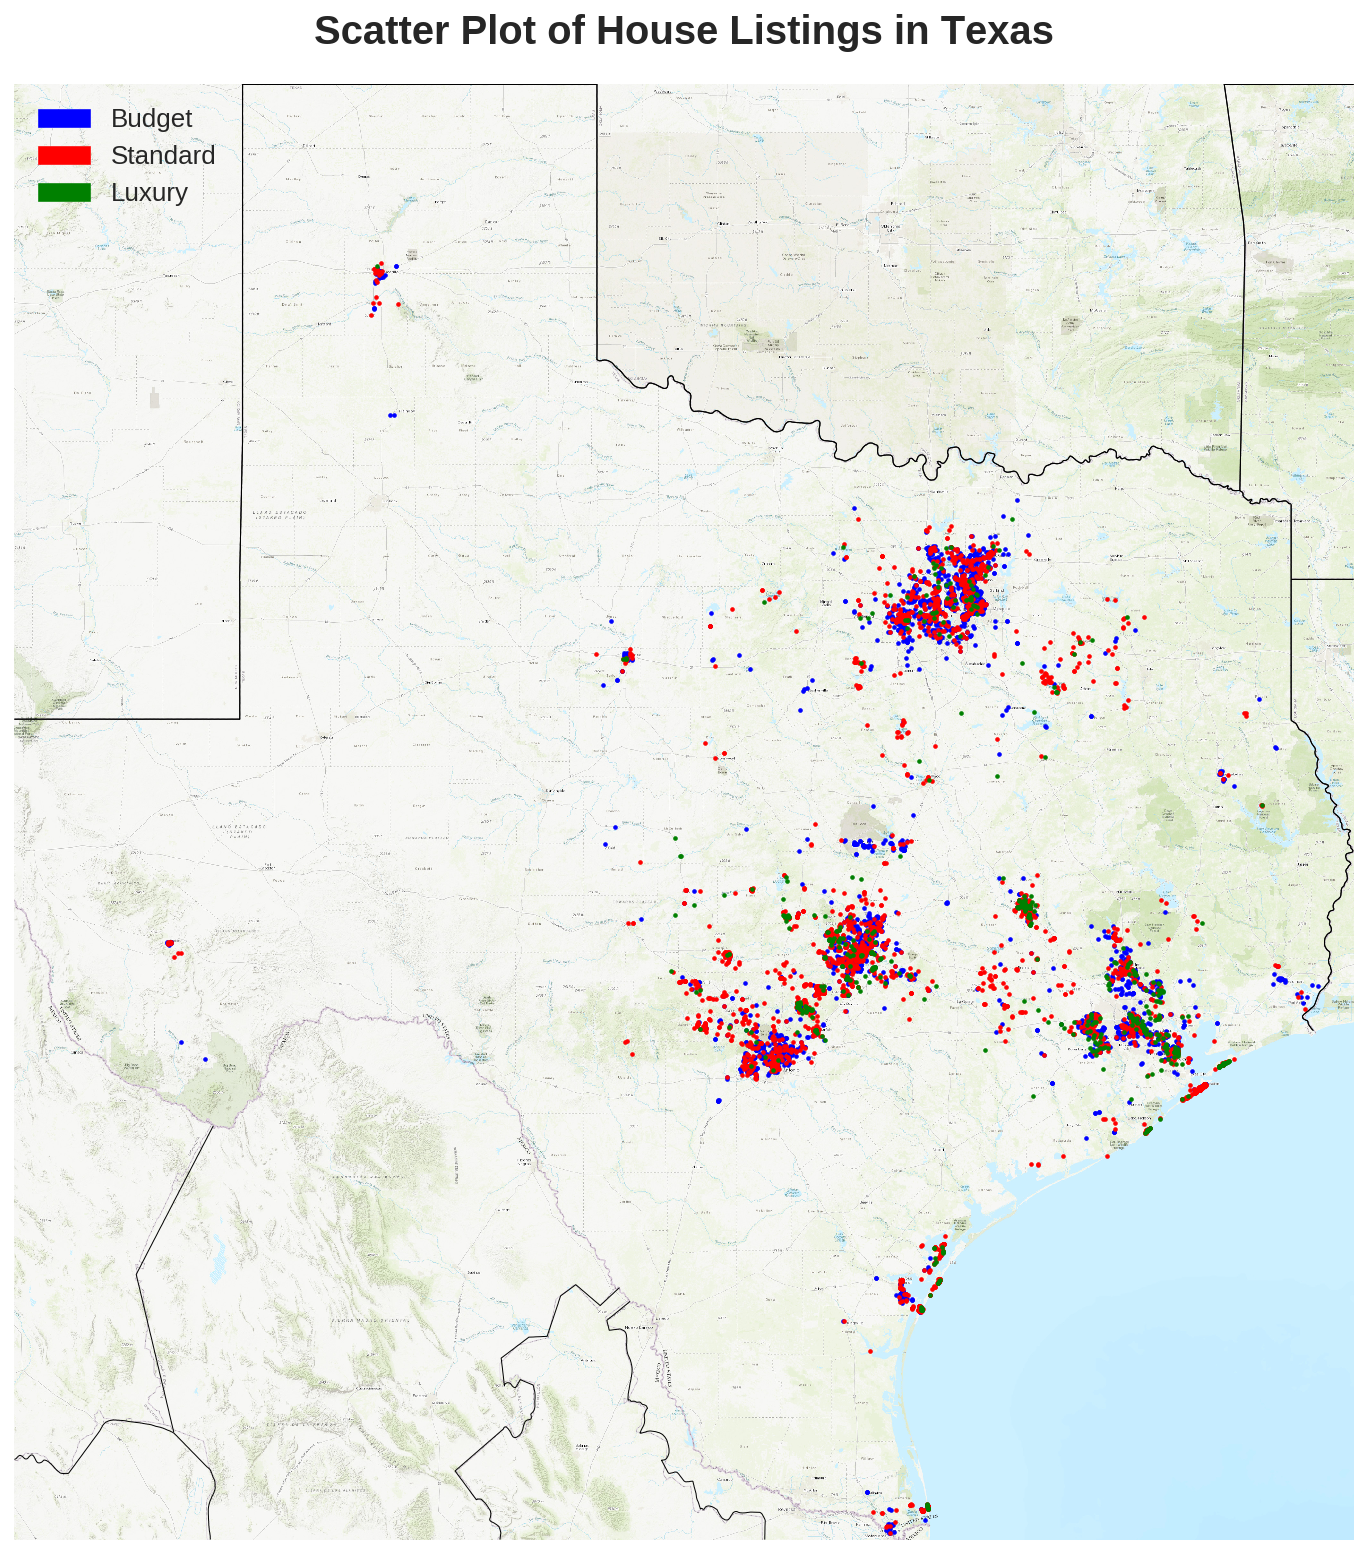

In [22]:
fig = plt.figure(figsize = (12, 15))
#Setting boundaries for the basemap
m = Basemap( llcrnrlat= 25.8419, urcrnrlat= 36.5008,
            llcrnrlon= -105, urcrnrlon= -93.5074, resolution='f', epsg = 3857)
m.shadedrelief()
#m.drawcountries(linewidth = 1)
#m.drawcoastlines(linewidth = 0.5)
m.drawstates(linewidth = 0.5)
#m.readshapefile('/home/simphiwe/Documents/notebooks/Housing Prices/Texas_County_Boundaries/Texas_County_Boundaries','Texas_County_Boundaries')
m.arcgisimage(service='World_Topo_Map', xpixels = 3000, verbose= True)

x1, y1 = m(lon1, lat1)
x2, y2 = m(lon2, lat2)
x3, y3 = m(lon3, lat3)
ax = plt.gca()

#Scatter plot for the three classes
plt.scatter(x1, y1, s=15, color='blue', marker ='.')
plt.scatter(x2, y2, s=15, color='red', marker ='.')
plt.scatter(x3, y3, s=15, color='green', marker ='.')


#Legend for the three classes

blue_patch = mpatches.Patch(color='blue', label='Budget')
red_patch = mpatches.Patch(color='red', label='Standard')
green_patch = mpatches.Patch(color='green', label='Luxury')
plt.legend([blue_patch, red_patch, green_patch],
           ('Budget', 'Standard', 'Luxury'), 
           loc='upper left', prop={'size':13})

plt.title('Scatter Plot of House Listings in Texas', size=20, fontweight='bold', pad=20)
plt.show()

In [27]:
STOP_WORDS = ["ax","i","your","edu","s","t","m","can","what","your","there","all","we","one","the","a",
              "an","of","or","in","for","by","on", "but","is","in","a","not","with","as","was","if","they",
              "are","this","and","it","have", "from","at","my","be","by","not","that","to","from","com",
              "org","like","likes","so"]

In [28]:
def tokenize(sentences, stop_word = STOP_WORDS):
    tokenized = sentences.tokenize("\\W+")
    tokenized_lower = tokenized.tolower()
    tokenized_filtered = tokenized_lower[(tokenized_lower.nchar() >= 2) | (tokenized_lower.isna()),:]
    tokenized_words = tokenized_filtered[tokenized_filtered.grep("[0-9]",invert=True,output_logical=True),:]
    tokenized_words = tokenized_words[(tokenized_words.isna()) | (~ tokenized_words.isin(STOP_WORDS)),:]
    return tokenized_words

In [32]:
# Break loan description into sequence of words

words = tokenize(df["Description"].to_string())

AttributeError: 'str' object has no attribute 'tokenize'

In [ ]:
""""
To-do list
1. Separate the month list and year (done)
2. Impute missing values for bedrooms potentially
3. Extract information from the description
""""

In [26]:
df

ID                                              Title  \
1          3                 Your Home Away From Home - Suite B   
2          4                            Quiet peaceful location   
3          5                                    Home Sweet Home   
4          7                Hideaway Guest Suite-Travis Heights   
5          8  BEACHFRONT GROUND FLOOR #111 Unbelievable View...   
6          9                                     The Lake House   
7         10                                  BEN K cozy home 2   
8         11                     Perfecto para venir de compras   
9         12                          The Treehouse at Big Blue   
10        13                                        Casita Arte   
11        14    Beautifully furnished beach condo! Water views!   
12        15                          Summit Hill South Cottage   
13        16  "That '70s Tow" Urban Glamper w/ Private Entrance   
14        17  3 BR Blocks to AT&T Stadium, Near Six Flags, More   
15        19                           122 Kontiki Beach Resort   
16        20                     Guest Room with King-sized bed   
17        21               Cool studio in groovy central Austin   
18        22                              Mason Park Apartments   
19        23               Private room near Main Street Frisco   
20        24                        Comfortable & Charming Home   
21        26                      East Dallas Comfortable Place   
23        27                                   The Tipsy Turtle   
24        28                 Garage Apt near Strand area & UTMB   
25        29                   The 1887 Campbell Home - Room #2   
26        30                            2/2 Popular Beach condo   
27        31   Crash on Comfortable Leather Couch Near 90 / 410   
28        32       Mediterranean Zen Villa with a stellar pool!   
29        33                                 Hill Country Cabin   
30        34      Fishing Shack - Key Allegro - great location!   
31        35                 Oak Cliff Cozy Cottage Bishop Arts   
...      ...                                                ...   
12882  11034                       Premier View on "Little Bay"   
12883  11035                     Asa's Escape - BMT Graduations   
12884  11036                          2 Rooms for Formula1 week   
12885  11039                Clean Home! Large Private Room/Bath   
12887  11040                Cozy room in a relaxing environment   
12888  11041  East of Austin By COTA & Airport *No Cleaning ...   
12889  11042                 Private apartment in EaDo/Eastwood   
12891  11043   Brady Villa @ D6: Heated Pool, Games, Hike 23 ac   
12892  11044                 Lovely Brick Home By Scott & White   
12893  11045                 Ease & Joy in the Heart of Austin!   
12894  11046             Super Bowl Weekend Gateway in Katy, TX   
12895  11048                 Moose Head Inn on Cedar Creek Lake   
12896  11049                   2/1 private guest house in Llano   
12897  11050                                   Le meilleur coin   
12899  11051                           Beautiful Southlake Home   
12900  11052                    Super Comfy Home Away from Home   
12902  11053                                Downtown Studio Apt   
12903  11054                       River Bunk House and Bullpen   
12904  11055                            Cozy Hill Country Cabin   
12909  11056                          Little House on the River   
12910  11057                 Private Room in Warm Boutique Home   
12912  11059                 Cozy bedroom in a gated community.   
12913  11060                Stylish Casita in Chic Neighborhood   
12914  11062                   Private suites with kitchenette.   
12915  11063                 Quaint Garage Apt in Alamo Heights   
12916  11064    Spacious Home 3bdrs near AT&T Stadium, UTA, TCU   
12917  11065                                    Das Porter Haus   
12918  11069         Charming Living & Working Space in A